## PROJECT OVERVIEW

SyriaTel is a telecommunications service provider offering mobile, internet, and related services.
There have been a loss in company's revenue due to customer's not staying for long.
we want to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.



## Objectives
Build a machine learning model that predicts whether a customer will churn based on their usage

We will start off the project by identifying our variable 

Target Variable: churn(True/False)

Type: Binary Classification


Here we import the required libraries and load the data set

In [25]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# load datasets
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Exploratory Data Analysis

EDA helps us understand the structure and patterns in the data before we build any model.

We'll begin by visualizing how many customers churned vs. stayed to understand the class imbalance. Inorder to understand how inbalanced our target variable is.

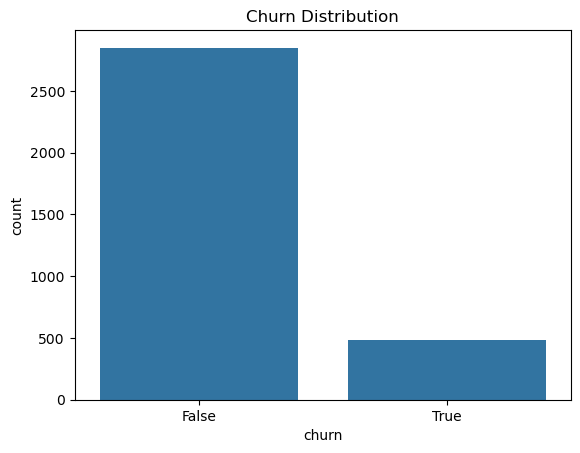

In [26]:
# Class Distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


We look at how numerical features are related to each other. This helps identify redundant features or strong predictors of churn.

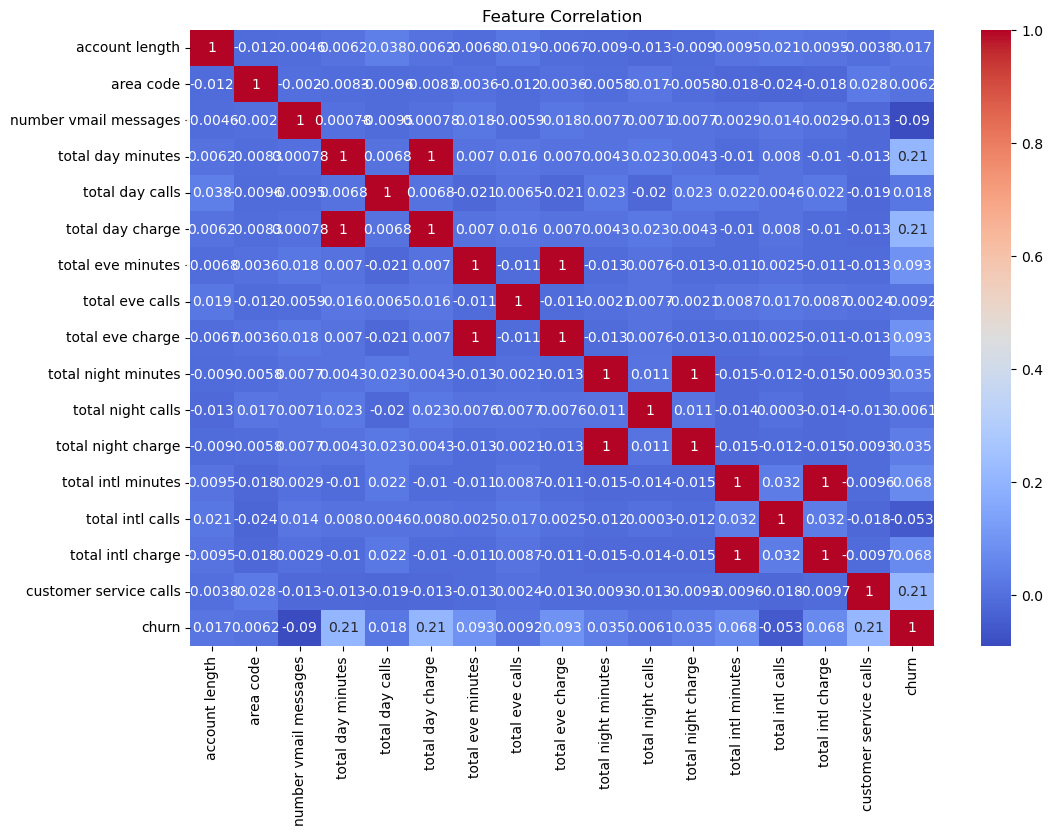

In [27]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Data Cleaning
Before training models, we need to clean and prepare the data so that it's in a suitable format for machine learning algorithms.


We remove the phone number column as it contains unique identifiers and doesn’t help with prediction.

In [28]:
# Drop irrelevant columns
df.drop(columns=['phone number'], inplace=True)

Machine learning models work with numbers, so we convert text-based columns (`true`/`false`, state names) into numeric form using label encoding.


In [29]:
# Encode categorical variables
label_cols = ['international plan', 'voice mail plan', 'state']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
  


In [30]:

# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']


# Train-Test Split
We divide the dataset into a training set (to build the model) and a test set (to evaluate it). Stratified sampling ensures class balance in both sets.

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We standardize the data so that features like call minutes and charges are on the same scale. This is especially important for logistic regression.

In [34]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
We want to train a basic and interpretable model and we will use Logistic regression i to assess performance.


In [35]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



# Model Results
Overall Accuracy: 86%

Macro Avg F1: 0.62

Weighted Avg F1: 0.84

# Model Interpretation:
Strong at predicting non-churners at 96%

The model correctly identifies 96% of customers who don’t churn.




# Decision Tree Classifier
A Decision Tree can capture non-linear relationships and is easier to interpret visually.


In [36]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       570
        True       0.67      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667



# Model Results
Accuracy: 90%

Precision for churn: 0.67

Recall for churn: 0.66

F1-score: 0.66

# Model Interpretation:

Big improvement over logistic regression.

Captures non-linear relationships.

Still relatively interpretable and performs reasonably well at detecting churners.

### Logistic Regression Hyperparameter Tuning


In [37]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=3, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
y_pred_lr = grid_lr.predict(X_test_scaled)

print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr))

Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



# Model Interpretation
 The model  predicts most customers as non-churners, leading to very low recall for churn (24%).

While accuracy (86%) and precision for churn (53%) look decent, they mask poor performance in identifying actual churners.

The model's F1-score for churn is just 0.33, showing weak reliability when applied to the positive class.

Increasing C allowed the model to better fit the training data, but did not help much with recall — the model is still too simple to handle complex churn behavior.

# Decision tree with hyper tuning



In [39]:
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=3, scoring='f1')
grid_tree.fit(X_train, y_train)
y_pred_tree = grid_tree.predict(X_test)

print("Best Decision Tree Parameters:", grid_tree.best_params_)
print(classification_report(y_test, y_pred_tree))

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       570
        True       0.88      0.65      0.75        97

    accuracy                           0.94       667
   macro avg       0.91      0.82      0.85       667
weighted avg       0.93      0.94      0.93       667



# Model Results
Accuracy: 94%

Precision for churn: 0.88

Recall for churn: 0.65

F1-score: 0.75

# Interpretation:

Best performance among all models.
has the high precision meaning  most flagged churners actually churn.

Moderate recall means it's catching 65% of them — good, but some still slip through.



Model limitations
- Logistic Regression assumes linear relationships between inputs and log-odds, which may not hold true.
- The model does not account for time-based trends or customer lifetime value.

###  Business Recommendations

- Customers with high day-time charges, international plans, and frequent support calls are more likely to churn.
- SyriaTel should:
  - Offer loyalty programs or bundle plans to high-risk segments.
  - Reduce churn by proactively reaching out to users with frequent service issues.
  - Consider offering discounts to users with high charges during the day or night periods.